In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file=h5py.File('/Users/sachiwee/Research/Carnegie/cloudyTableBC2003.hdf5','r')

In [3]:
np.shape(file['lines'])

(18,)

In [11]:
beta=(file['lines']['balmerBeta4863'][:])

In [25]:
oiii=(file['lines']['oxygenIII5008'][:])
nii=file['lines']['nitrogenII6585'][:]
alpha=file['lines']['balmerAlpha6565']

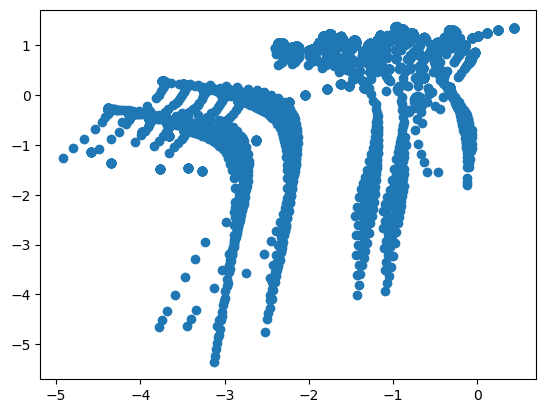

In [30]:
plt.scatter(np.log10(nii/alpha),np.log10(oiii/beta))
ratio_x=np.log10(nii/alpha)
ratio_y=np.log10(oiii/beta)

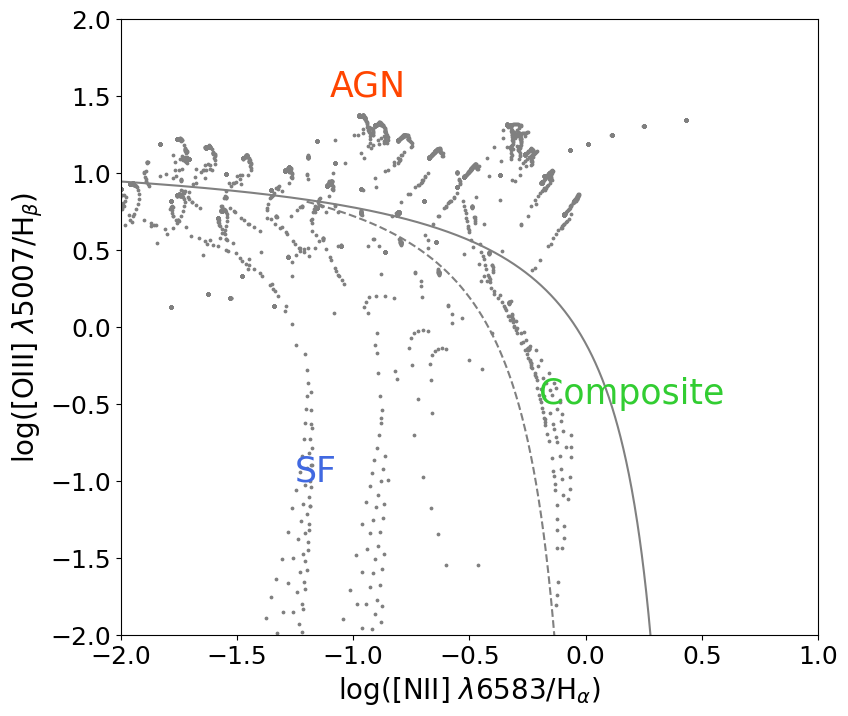

In [29]:
xx=np.linspace(-1.2,-0.1,1000)
xb=np.linspace(-2,0.4,1000)
x3=np.linspace(-0.3,1.5,1000)

#Kewley+1
sb=(0.61/(xb-0.47))+ 1.19

#Kauffmann+3
sf=(0.61/(xx-0.05))+ 1.3
fig=plt.figure(figsize=(9,8))
ax= fig.add_subplot(111)

ax.text(-1.25,-1,'SF',size=25,color='royalblue')
ax.text(-1.1,1.5,'AGN',size=25,color='orangered')
ax.text(-0.2,-0.5,'Composite',size=25,color='limegreen')

ax.plot(xx,sf,c='grey',linestyle='--',label='Kauffmann+03')
ax.plot(xb,sb,c='grey',linestyle='-',label='Kewley+01')

ax.scatter(ratio_x,ratio_y,s=3,c='grey')
ax.set_xlim(-2,1)
ax.set_ylim(-2,2)
ax.set_xlabel(r'log([NII] $\lambda6583$/$\mathrm{H}_{\alpha})$',size=20)
ax.set_ylabel(r'log([OIII] $\lambda$5007/$\mathrm{H}_{\beta})$',size=20)
ax.tick_params(axis='both', which='major', labelsize=18)

In [4]:
print(np.shape(file['metallicity']))
print(np.shape(file['age']))

(6,)
(221,)


In [5]:
age=file['age'][:]
metallicity=file['metallicity'][:]
print(np.amax(age),np.amin(metallicity))

print(metallicity[0])
mask=age>(30/1000)

20.0 0.005319148936170211
0.005319148936170211


In [6]:
print(age[mask])

[ 0.031       0.032       0.033       0.034       0.035       0.036
  0.037       0.038       0.039       0.04        0.0425      0.045
  0.0475      0.05        0.0525      0.055       0.057088    0.0640538
  0.0718696   0.080639    0.0904785   0.101518    0.113906    0.127804
  0.14339901  0.160896    0.18052899  0.20255699  0.227272    0.255004
  0.28611901  0.32103101  0.36020301  0.40415398  0.45346899  0.50880099
  0.57088397  0.64054298  0.71870099  0.80639603  0.904792    1.01519002
  1.13906995  1.27805005  1.434       1.60897997  1.68        1.7
  1.8         1.9         2.          2.1         2.2         2.3
  2.4         2.5         2.6         2.75000013  3.          3.24999987
  3.5         3.75000013  4.          4.24999987  4.49999974  4.75000013
  5.          5.24999987  5.50000026  5.75000013  6.          6.24999987
  6.49999974  6.75000013  7.          7.24999987  7.50000026  7.75000013
  8.          8.24999987  8.49999974  8.75000013  8.99999949  9.24999987
  9.500

In [7]:
file.keys()

<KeysViewHDF5 ['age', 'ionizingLuminosityHydrogen', 'ionizingLuminosityHydrogenNormalized', 'lines', 'metallicity']>

In [8]:
Qh=file['ionizingLuminosityHydrogen'][:]

In [9]:
Lalpha=file['lines']['balmerAlpha6565'][:]

In [10]:
print(np.shape(Lalpha))
print(np.shape(Qh))

(5, 6, 221)
(5,)


In [23]:
print(Lalpha[0][0])

[1.44877185e+36 1.44877185e+36 1.44877185e+36 1.44877185e+36
 1.44877185e+36 1.44877185e+36 1.44877185e+36 1.44877185e+36
 1.44877185e+36 1.44877185e+36 1.44877185e+36 1.44877185e+36
 1.44877185e+36 1.44877185e+36 1.44543977e+36 1.44543977e+36
 1.44543977e+36 1.44211535e+36 1.44211535e+36 1.43879858e+36
 1.43879858e+36 1.43879858e+36 1.43879858e+36 1.43879858e+36
 1.43879858e+36 1.43879858e+36 1.43548943e+36 1.43548943e+36
 1.43548943e+36 1.43548943e+36 1.43548943e+36 1.43218790e+36
 1.43218790e+36 1.42889396e+36 1.42889396e+36 1.42560759e+36
 1.42560759e+36 1.42232879e+36 1.42232879e+36 1.41905752e+36
 1.41905752e+36 1.41579378e+36 1.41253754e+36 1.40928880e+36
 1.40604752e+36 1.40281370e+36 1.39958732e+36 1.39636836e+36
 1.38995263e+36 1.38995263e+36 1.38675583e+36 1.38356638e+36
 1.38356638e+36 1.38356638e+36 1.38038426e+36 1.38038426e+36
 1.37720947e+36 1.37720947e+36 1.37404198e+36 1.37404198e+36
 1.37088177e+36 1.37088177e+36 1.36772883e+36 1.36458314e+36
 1.36772883e+36 1.370881

In [45]:
print(Lalpha[0]/1e48)

[[1.43879858e-12 1.43879858e-12 1.43879858e-12 ... 1.51356125e-12
  1.52405275e-12 1.49623566e-12]
 [1.42560759e-12 1.42560759e-12 1.42560759e-12 ... 1.50314197e-12
  1.50660707e-12 1.48936108e-12]
 [1.41905752e-12 1.41905752e-12 1.41905752e-12 ... 1.51356125e-12
  1.51008015e-12 1.48251809e-12]
 ...
 [1.37404198e-12 1.37404198e-12 1.37404198e-12 ... 1.36772883e-12
  1.36144468e-12 1.36458314e-12]
 [1.38995263e-12 1.38995263e-12 1.38995263e-12 ... 1.37088177e-12
  1.36458314e-12 1.36772883e-12]
 [1.40281370e-12 1.40281370e-12 1.40281370e-12 ... 1.38038426e-12
  1.37720947e-12 1.38675583e-12]]
